<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">Classification with Python</font></h1>

In this notebook, we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

Lets download the dataset

In [2]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2019-06-25 14:56:16--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.002s  

2019-06-25 14:56:16 (11.3 MB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File  

In [3]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
df.shape

(346, 10)

### Convert to date time object 

In [5]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 10 columns):
Unnamed: 0        346 non-null int64
Unnamed: 0.1      346 non-null int64
loan_status       346 non-null object
Principal         346 non-null int64
terms             346 non-null int64
effective_date    346 non-null datetime64[ns]
due_date          346 non-null datetime64[ns]
age               346 non-null int64
education         346 non-null object
Gender            346 non-null object
dtypes: datetime64[ns](2), int64(5), object(3)
memory usage: 27.1+ KB


# Data visualization and pre-processing



Let’s see how many of each class is in our data set 

In [7]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


Lets plot some columns to underestand data better:

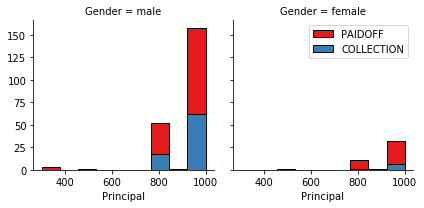

In [8]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

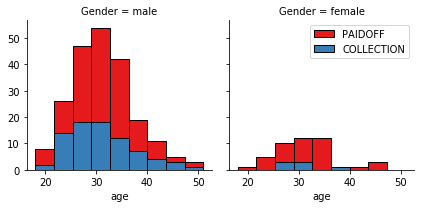

In [9]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

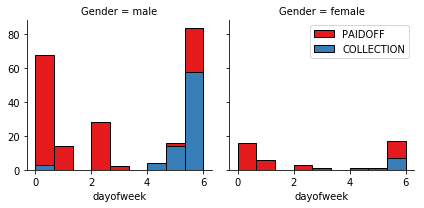

In [10]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 

In [11]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values

Lets look at gender:

In [12]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Lets convert male to 0 and female to 1:


In [13]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding  
#### How about education?

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


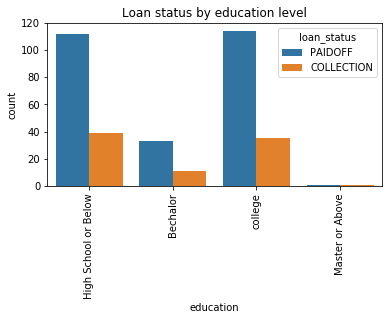

In [14]:
plt.figure(figsize=(6,3))
ax1=plt.subplot(111)
sns.countplot(x="education", hue='loan_status',data=df, ax=ax1)
plt.xticks(rotation=90)
plt.xlabel('education')
plt.title('Loan status by education level')
plt.show()

In [15]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Feature before One Hot Encoding

In [16]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to convert categorical varables to binary variables and append them to the feature Data Frame 

In [17]:
Feature = df[['Principal','terms','age','weekend','dayofweek','Gender']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,weekend,dayofweek,Gender,Bechalor,High School or Below,college
0,1000,30,45,0,3,0,0,1,0
1,1000,30,33,0,3,1,1,0,0
2,1000,15,27,0,3,0,0,0,1
3,1000,30,28,1,4,1,0,0,1
4,1000,30,29,1,4,0,0,0,1


### Feature selection

Lets defind feature sets, X:

In [18]:
X = Feature
X[0:5]

,Principal,terms,age,weekend,dayofweek,Gender,Bechalor,High School or Below,college
0,1000,30,45,0,3,0,0,1,0
1,1000,30,33,0,3,1,1,0,0
2,1000,15,27,0,3,0,0,0,1
3,1000,30,28,1,4,1,0,0,1
4,1000,30,29,1,4,0,0,0,1


What are our lables?

In [19]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'], dtype=object)

In [20]:
print(X.shape)
print(y.shape)

(346, 9)
(346,)


## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [21]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -1.20577805, -0.26122054,
        -0.42056004, -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148, -1.20577805, -0.26122054,
         2.37778177,  2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -1.20577805, -0.26122054,
        -0.42056004, -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  0.82934003,  0.12175534,
         2.37778177, -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 ,  0.82934003,  0.12175534,
        -0.42056004, -0.38170062, -0.87997669,  1.14984679]])

# Prepare the Data for Classification Algorithms

We will use Scikit-Learn `Pipeline` class to create pipelines for summarizing the above pre-processing steps and prepare the data for ML algorithms. Note that the pipeline process should be used to prepare not only the training dataset but also the test.

Let's load a clean copy of the train dataset

In [22]:
loan_train = pd.read_csv('loan_train.csv')

Create a `class` to select numerical, categorical or datetime columns from the dataframe

In [23]:
from sklearn.base import BaseEstimator, TransformerMixin

class FeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        print('feature names:', self.attribute_names)
        return X[self.attribute_names]

## Datetime Features

In [24]:
date_features = ["due_date", "effective_date"]

Create a `class` to convert columns to datetime objects

In [25]:
class DateTimeTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        return X.apply(pd.to_datetime)

In [26]:
class ExtractDayOfTheWeekAndWeekend(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X['dayofweek'] = X['effective_date'].dt.dayofweek
        X['weekend'] = X['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
        return X[['weekend', 'dayofweek']]        

In [27]:
from sklearn.pipeline import Pipeline

date_pipeline = Pipeline([
    ("selector", FeatureSelector(date_features)),
    ("transformer", DateTimeTransformer()),
    ("extractor", ExtractDayOfTheWeekAndWeekend())
])

In [28]:
date_pipeline.fit_transform(loan_train)[:5]

feature names: ['due_date', 'effective_date']


,weekend,dayofweek
0,0,3
1,0,3
2,0,3
3,1,4
4,1,4


## Categorical Features

In [29]:
cat_features = ['Gender', 'education']

In [30]:
class ConvertToNumerical(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X = pd.concat([X, pd.DataFrame(np.where(X['Gender']=='male', 0, 1), columns=['GenderNum'])], axis=1)
        X = pd.concat([X, pd.get_dummies(X['education'])], axis=1)
        X.drop(['education', 'Master or Above', 'Gender'], axis = 1, inplace=True)
        return X.astype(float)

In [31]:
cat_pipeline = Pipeline([
    ("selector", FeatureSelector(cat_features)),
    ("convertor", ConvertToNumerical())
])

In [32]:
cat_pipeline.fit_transform(loan_train)[:5]

feature names: ['Gender', 'education']


,GenderNum,Bechalor,High School or Below,college
0,0.0,0.0,1.0,0.0
1,1.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0


## Numerical Features

In [33]:
num_features = ['Principal','terms','age']

In [34]:
num_pipeline = Pipeline([
    ("selector", FeatureSelector(num_features))
])

In [35]:
num_pipeline.fit_transform(loan_train)[:5]

feature names: ['Principal', 'terms', 'age']


,Principal,terms,age
0,1000,30,45
1,1000,30,33
2,1000,15,27
3,1000,30,28
4,1000,30,29


## Transformation Pipeline

In [36]:
from sklearn.pipeline import FeatureUnion

preprocess_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("date_pipeline", date_pipeline),
    ("cat_pipeline", cat_pipeline),
    ])

In [37]:
from sklearn.preprocessing import StandardScaler

preparation_pipeline = Pipeline([
    ("preparation", preprocess_pipeline),
    ("scaler", StandardScaler())
])

In [38]:
X_train = preparation_pipeline.fit_transform(loan_train)
y_train = loan_train['loan_status']
X_train

feature names: ['Principal', 'terms', 'age']
feature names: ['due_date', 'effective_date']
feature names: ['Gender', 'education']


array([[ 0.51578458,  0.92071769,  2.33152555, ..., -0.38170062,
         1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148, ...,  2.61985426,
        -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, ..., -0.38170062,
        -0.87997669,  1.14984679],
       ..., 
       [-1.31458942, -0.95911111,  1.33661351, ..., -0.38170062,
        -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188, ..., -0.38170062,
        -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.81902922, ..., -0.38170062,
        -0.87997669,  1.14984679]])

In [39]:
print(X_train.shape)
print(y_train.shape)

(346, 9)
(346,)


In [40]:
np.array_equal(X_train, X)

True

In [41]:
np.array_equal(y_train.values, y)

True

# Classification 

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression



__ Notice:__ 
- You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

# K Nearest Neighbor(KNN)
Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the __loan_test.csv__ for finding the best k, however, you can split your train_loan.csv into train and test to find the best __k__.

In [42]:
from sklearn.neighbors import KNeighborsClassifier

### Find optimal k without GridSearchCV

In [43]:
from sklearn.model_selection import train_test_split

X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print ('Total set:', X_train.shape,  y_train.shape)
print ('Train set:', X_train1.shape,  y_train1.shape)
print ('Test set:', X_val.shape,  y_val.shape)

Total set: (346, 9) (346,)
Train set: (276, 9) (276,)
Test set: (70, 9) (70,)


In [44]:
from sklearn.metrics import accuracy_score

Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1, Ks):    
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = n).fit(X_train1, y_train1)
    y_pred = knn.predict(X_val)
    mean_acc[n-1] = accuracy_score(y_val, y_pred)
    std_acc[n-1]=np.std(y_pred==y_val)/np.sqrt(y_pred.shape[0])

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.771428571429 with k= 3


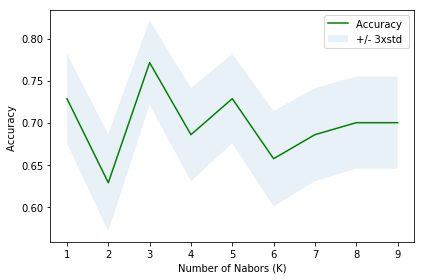

In [45]:
plt.plot(range(1, Ks), mean_acc,'g')
plt.fill_between(range(1,Ks), mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

### Find optimal k with GridSearchCV

We will prefer `GridSearchCV` to find the optimal k since it does also cross-validation, which helps avoid overfitting

In [46]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors':range(1, 10)}

knn_clf = KNeighborsClassifier()

knn_grd_search = GridSearchCV(knn_clf, param_grid, cv=3)
knn_grd_search.fit(X_train, y_train)

print("best parameter: {}".format(knn_grd_search.best_params_))
print("best score: {}".format(knn_grd_search.best_score_))
print("best model: {}".format(knn_grd_search.best_estimator_))

best parameter: {'n_neighbors': 5}
best score: 0.7196531791907514
best model: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')


In [47]:
cvres = knn_grd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.647398843931 {'n_neighbors': 1}
0.624277456647 {'n_neighbors': 2}
0.705202312139 {'n_neighbors': 3}
0.64450867052 {'n_neighbors': 4}
0.719653179191 {'n_neighbors': 5}
0.667630057803 {'n_neighbors': 6}
0.664739884393 {'n_neighbors': 7}
0.635838150289 {'n_neighbors': 8}
0.658959537572 {'n_neighbors': 9}


# Decision Tree

We will use `GridSearchCV` to find the best value for the `min_samples_leaf` hyperparameter for the `DecisionTreeClassifier`

In [48]:
from sklearn.tree import DecisionTreeClassifier

param_gird = {'min_samples_leaf':range(2, 10)}

tree_clf = DecisionTreeClassifier(criterion="entropy", random_state=42)

tree_grd_search = GridSearchCV(tree_clf, param_gird, cv=3)
tree_grd_search.fit(X_train, y_train)

print("best parameter: {}".format(tree_grd_search.best_params_))
print("best score: {}".format(tree_grd_search.best_score_))
print("best model: {}".format(tree_grd_search.best_estimator_))

best parameter: {'min_samples_leaf': 3}
best score: 0.6705202312138728
best model: DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')


In [49]:
cvres = tree_grd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.64161849711 {'min_samples_leaf': 2}
0.670520231214 {'min_samples_leaf': 3}
0.667630057803 {'min_samples_leaf': 4}
0.656069364162 {'min_samples_leaf': 5}
0.658959537572 {'min_samples_leaf': 6}
0.653179190751 {'min_samples_leaf': 7}
0.632947976879 {'min_samples_leaf': 8}
0.624277456647 {'min_samples_leaf': 9}


# Support Vector Machine

We will use `RandomizedSearchCV` to find the best value for the `kernel`, `C` and `gamma` hyperparameter for the `SVC`

In [50]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal
from sklearn.svm import SVC

param_distribs = {
        'kernel': ['linear', 'rbf'],
        'C': reciprocal(0.1, 10),
        'gamma': expon(scale=1.0)
    }

svm_clf = SVC()

svm_rnd_search = RandomizedSearchCV(svm_clf, param_distributions=param_distribs, n_iter=15, cv=3, random_state=42)
svm_rnd_search.fit(X_train, y_train)

print("best parameter: {}".format(svm_rnd_search.best_params_))
print("best score: {}".format(svm_rnd_search.best_score_))
print("best model: {}".format(svm_rnd_search.best_estimator_))

best parameter: {'gamma': 3.5035574751583121, 'kernel': 'rbf', 'C': 0.10994335574766197}
best score: 0.7514450867052023
best model: SVC(C=0.10994335574766197, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=3.5035574751583121,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


In [51]:
cvres = svm_rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.592485549133 {'gamma': 3.010121430917521, 'kernel': 'linear', 'C': 0.56115164153345043}
0.658959537572 {'gamma': 0.90844696963212535, 'kernel': 'rbf', 'C': 3.6256176345762263}
0.702312138728 {'gamma': 0.059838768608680676, 'kernel': 'rbf', 'C': 0.20511104188433973}
0.592485549133 {'gamma': 0.15416196746656105, 'kernel': 'linear', 'C': 0.46496174473363316}
0.751445086705 {'gamma': 3.5035574751583121, 'kernel': 'rbf', 'C': 0.10994335574766197}
0.595375722543 {'gamma': 0.00077906923665822954, 'kernel': 'rbf', 'C': 7.5353845092955432}
0.722543352601 {'gamma': 0.36275372946047713, 'kernel': 'rbf', 'C': 0.23270677083837799}
0.592485549133 {'gamma': 0.023332523598323388, 'kernel': 'linear', 'C': 0.10330768043240404}
0.664739884393 {'gamma': 0.15023452872733867, 'kernel': 'rbf', 'C': 1.6738085788752124}
0.664739884393 {'gamma': 0.26497040005002437, 'kernel': 'rbf', 'C': 8.8615774525330693}
0.592485549133 {'gamma': 0.22273586212869029, 'kernel': 'linear', 'C': 3.7183641805732068}
0.5924855491

# Logistic Regression

We will use `RandomizedSearchCV` to find the best value for the `C` hyperparameter for the `LogisticRegression`

In [52]:
from sklearn.linear_model import LogisticRegression

param_distribs = {
        'solver': ['lbfgs', 'liblinear', 'sag'],
        'C': reciprocal(0.01, 10)
    }

log_reg = LogisticRegression()

log_rnd_search = RandomizedSearchCV(log_reg, param_distributions=param_distribs, n_iter=15, cv=3, random_state=42)
log_rnd_search.fit(X_train, y_train)

print("best parameter: {}".format(log_rnd_search.best_params_))
print("best score: {}".format(log_rnd_search.best_score_))
print("best model: {}".format(log_rnd_search.best_estimator_))

best parameter: {'solver': 'sag', 'C': 0.029375384576328285}
best score: 0.708092485549133
best model: LogisticRegression(C=0.029375384576328285, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='sag', tol=0.0001, verbose=0, warm_start=False)


In [53]:
cvres = log_rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.64161849711 {'solver': 'lbfgs', 'C': 0.13292918943162163}
0.679190751445 {'solver': 'lbfgs', 'C': 0.035506214270707694}
0.627167630058 {'solver': 'liblinear', 'C': 0.61737703947045719}
0.708092485549 {'solver': 'sag', 'C': 0.029375384576328285}
0.627167630058 {'solver': 'lbfgs', 'C': 0.2386418878005605}
0.618497109827 {'solver': 'sag', 'C': 0.63583588566762506}
0.575144508671 {'solver': 'liblinear', 'C': 0.011527987128232399}
0.618497109827 {'solver': 'liblinear', 'C': 1.4655354118727704}
0.658959537572 {'solver': 'lbfgs', 'C': 0.043352817949515635}
0.624277456647 {'solver': 'liblinear', 'C': 0.71194186001729876}
0.624277456647 {'solver': 'lbfgs', 'C': 0.375205585512428}
0.656069364162 {'solver': 'sag', 'C': 0.074763120622522994}
0.635838150289 {'solver': 'sag', 'C': 0.15833718339012057}
0.627167630058 {'solver': 'sag', 'C': 0.23345864076016232}
0.624277456647 {'solver': 'sag', 'C': 0.71640404281910097}


In [54]:
clf_models = {name: search.best_estimator_ for name, search in zip(('KNN','DecisionTree','SVM','LogisticRegression'), (knn_grd_search, tree_grd_search, svm_rnd_search, log_rnd_search))}
clf_models

{'DecisionTree': DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=3, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False, random_state=42,
             splitter='best'),
 'KNN': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
            metric_params=None, n_jobs=1, n_neighbors=5, p=2,
            weights='uniform'),
 'LogisticRegression': LogisticRegression(C=0.029375384576328285, class_weight=None, dual=False,
           fit_intercept=True, intercept_scaling=1, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           solver='sag', tol=0.0001, verbose=0, warm_start=False),
 'SVM': SVC(C=0.10994335574766197, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma=3.503557475158312

In [55]:
print('Train Set Scores')
print('----------------')
for key, clf in clf_models.items():
    print("{}: {:.4f}".format(key, clf.score(X_train, y_train)))

Train Set Scores
----------------
KNN: 0.8237
SVM: 0.7514
LogisticRegression: 0.7514
DecisionTree: 0.8613


# Model Evaluation using Test set

In [56]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

First, download and load the test set:

In [57]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2019-06-25 14:56:20--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

100%[======================================>] 3,642       --.-K/s   in 0s      

2019-06-25 14:56:20 (592 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation 

In [58]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [59]:
X_test = preparation_pipeline.transform(test_df)
y_test = test_df['loan_status']
X_test[:5]

feature names: ['Principal', 'terms', 'age']
feature names: ['due_date', 'effective_date']
feature names: ['Gender', 'education']


array([[ 0.51578458,  0.92071769,  3.16061891, -1.20577805, -0.26122054,
         2.37778177,  2.61985426, -0.87997669, -0.86968108],
       [-5.89052444, -1.96168647,  0.67333883,  0.82934003,  0.12175534,
        -0.42056004, -0.38170062, -0.87997669, -0.86968108],
       [ 0.51578458,  0.92071769,  1.9998882 ,  0.82934003,  0.50473121,
         2.37778177, -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769, -0.81902922,  0.82934003,  0.50473121,
        -0.42056004, -0.38170062, -0.87997669,  1.14984679],
       [-1.31458942, -0.95911111, -0.3215732 ,  0.82934003,  0.88770709,
        -0.42056004,  2.61985426, -0.87997669, -0.86968108]])

In [60]:
print(X_test.shape)
print(y_test.shape)

(54, 9)
(54,)


In [61]:
jaccard_scores = {key:jaccard_similarity_score(y_test, clf.predict(X_test)) for key, clf in clf_models.items()}
jaccard_scores

{'DecisionTree': 0.7407407407407407,
 'KNN': 0.70370370370370372,
 'LogisticRegression': 0.7407407407407407,
 'SVM': 0.7407407407407407}

In [62]:
f1_scores = {key:f1_score(y_test, clf.predict(X_test), labels=['PAIDOFF','COLLECTION'], pos_label='PAIDOFF') for key, clf in clf_models.items()}
f1_scores

{'DecisionTree': 0.8292682926829269,
 'KNN': 0.80487804878048763,
 'LogisticRegression': 0.85106382978723405,
 'SVM': 0.85106382978723405}

In [63]:
log_loss_scores = {key:log_loss(y_test, clf.predict_proba(X_test)) for key, clf in clf_models.items() if key=='LogisticRegression'}
log_loss_scores

{'LogisticRegression': 0.49392815308851634}

# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | ?       | ?        | NA      |
| Decision Tree      | ?       | ?        | NA      |
| SVM                | ?       | ?        | NA      |
| LogisticRegression | ?       | ?        | ?       |

In [64]:
pd.DataFrame([jaccard_scores, f1_scores, log_loss_scores], index=['Jaccard', 'F1-score', 'LogLoss']).T

,Jaccard,F1-score,LogLoss
DecisionTree,0.740741,0.829268,NaN
KNN,0.703704,0.804878,NaN
LogisticRegression,0.740741,0.851064,0.493928
SVM,0.740741,0.851064,NaN


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.</p>